## Einführung in die Analyse von Zugverspätungen

In diesem Beispiel analysieren wir die durchschnittlichen Verspätungen verschiedener Zugarten. Dafür wird zunächst eine CSV-Datei mit Verspätungsdaten eingelesen und die durchschnittliche Verspätung für jede Zugart berechnet. Anschließend visualisieren wir die Ergebnisse in einem Balkendiagramm, das uns hilft, die Verspätungsstatistik je nach Zugart zu vergleichen und die durchschnittlichen Verspätungen auf einen Blick zu erkennen.

### Code-Beschreibung

1. **Berechnung der Durchschnittsverspätungen:**  
   Der erste Codeabschnitt liest die Daten aus einer CSV-Datei ein und berechnet die durchschnittliche Verspätung pro Zugart mithilfe der Funktion `calculate_average_delay`. Die Option `include_zero_delay` legt fest, ob auch Zugarten ohne Verspätungen (0 Minuten) in die Analyse einbezogen werden sollen. Das Ergebnis ist eine Tabelle mit den durchschnittlichen Verspätungen pro Zugart.

2. **Visualisierung der Verspätungen:**  
   Im zweiten Abschnitt wird die `plot_delay`-Funktion verwendet, um die berechneten Durchschnittsverspätungen als Balkendiagramm darzustellen. Jeder Balken repräsentiert eine Zugart und zeigt die jeweilige durchschnittliche Verspätung an. Die Verspätungswerte werden zusätzlich oberhalb der Balken angezeigt, um die Werte direkt abzulesen.

#### Beispielaufruf:

```python
# Beispielaufruf der Funktion
file_path = 'out/Result_41.csv'  # Passe den Pfad hier an
average_delays = calculate_average_delay(file_path, include_zero_delay=False)  # Setze True oder False
print("Durchschnittliche Verspätungen:\n", average_delays)

# Plotten der Verzögerungen
plot_delay(average_delays)


Durchschnittliche Verspätungen:
    Zugart  Durchschnittliche Verspätung (Minuten)
0     Bus                                0.000000
1     ECE                                0.000000
2     HLB                               50.000000
3      IC                                0.000000
4     ICE                               61.186147
5       N                               39.363636
6      NJ                                0.000000
7      RB                                0.000000
8      RE                               34.166667
9       S                               35.769231
10    TGV                                0.000000
11    VIA                               40.565217


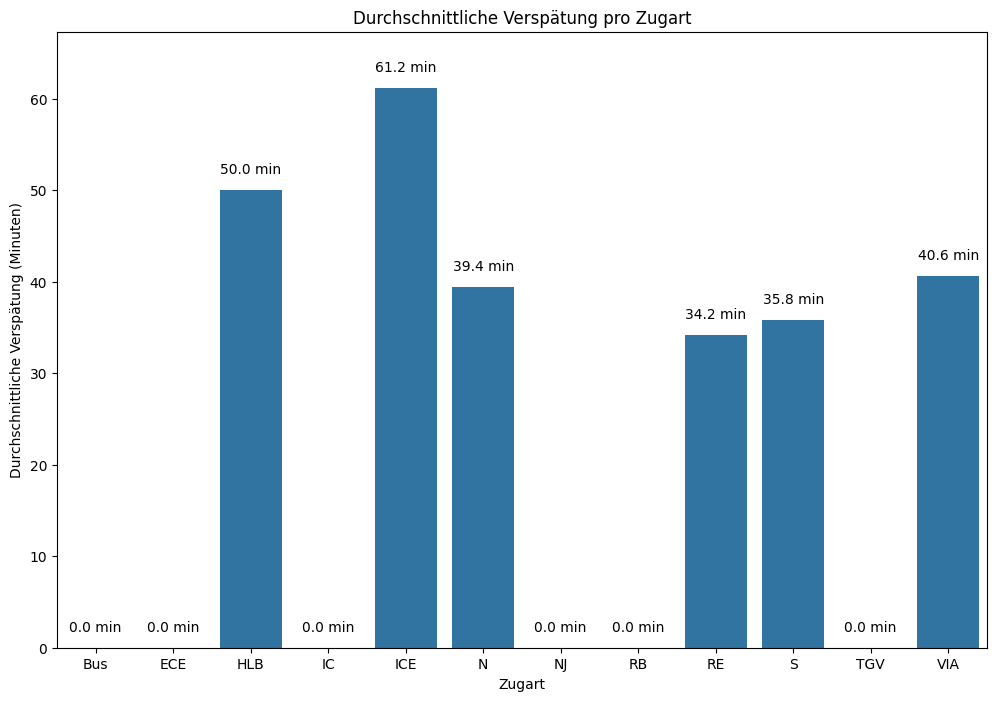

In [ ]:
# Beispielaufruf der Funktion
file_path = 'out/Result_41.csv'  # Passe den Pfad hier an
average_delays = calculate_average_delay(file_path, include_zero_delay=False)  # Setze True oder False
print("Durchschnittliche Verspätungen:\n", average_delays)

# Plotten der Verzögerungen
plot_delay(average_delays)

### Funktion: calculate_average_delay

Die `calculate_average_delay`-Funktion berechnet die durchschnittliche Verspätung pro Zugart aus einer CSV-Datei, die Verspätungsdaten enthält.

#### Parameter:
- **file_path**: Der Pfad zur CSV-Datei, die die Daten zur Verspätung enthält. Die Datei sollte zwei Spalten haben: `'Zugart'` und `'Verspätung in Minuten'`.
- **include_zero_delay** *(optional)*: Ein boolescher Parameter, der festlegt, ob Zugarten, deren durchschnittliche Verspätung Null Minuten beträgt, in die Berechnung einbezogen werden sollen. Wenn `True`, werden auch Einträge mit `0` Minuten Verspätung berücksichtigt. Standardwert ist `True`.

#### Rückgabewert:
Die Funktion gibt ein DataFrame mit zwei Spalten zurück:
- **Zugart**: Die Art des Zuges (z.B. ICE, RE).
- **Durchschnittliche Verspätung (Minuten)**: Die durchschnittliche Verspätung der jeweiligen Zugart in Minuten.

#### Funktionsweise:
1. Prüft, ob die Datei existiert. Falls nicht, wird ein `FileNotFoundError` ausgelöst.
2. Liest die CSV-Datei ohne Header ein und benennt die Spalten in `'Zugart'` und `'Verspätung in Minuten'`.
3. Berechnet die durchschnittliche Verspätung pro Zugart für Einträge mit mehr als 0 Minuten Verspätung.
4. Ergänzt die Anzahl der Vorkommen jeder Zugart und füllt fehlende Durchschnittswerte mit `0`.
5. Falls `include_zero_delay` auf `False` gesetzt ist, werden Zugarten mit einer durchschnittlichen Verspätung von `0` aus dem Ergebnis entfernt.


In [17]:
import pandas as pd
import os

def calculate_average_delay(file_path, include_zero_delay=True):
    # Überprüfen, ob der Dateipfad gültig ist
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Die Datei wurde nicht gefunden: {file_path}")
    
    # CSV-Datei einlesen, ohne Header
    df = pd.read_csv(file_path, header=None, names=['Zugart', 'Verspätung in Minuten'])
    
    # Durchschnittliche Verspätung pro Zugart berechnen (nur für Verspätungen > 0)
    avg_delay = df[df['Verspätung in Minuten'] > 0].groupby('Zugart')['Verspätung in Minuten'].mean().reset_index()
    
    # Spaltennamen anpassen
    avg_delay.columns = ['Zugart', 'Durchschnittliche Verspätung (Minuten)']
    
    # Alle Zugarten im ursprünglichen DataFrame beibehalten
    all_delays = df.groupby('Zugart')['Verspätung in Minuten'].count().reset_index()
    all_delays.columns = ['Zugart', 'Anzahl']

    # Zusammenführen der Durchschnittswerte mit der Anzahl
    result = pd.merge(all_delays, avg_delay, on='Zugart', how='left')

    # Füllen der fehlenden Durchschnittswerte mit 0
    result['Durchschnittliche Verspätung (Minuten)'] = result['Durchschnittliche Verspätung (Minuten)'].fillna(0)

    # Filtere das Ergebnis basierend auf dem Parameter include_zero_delay
    if not include_zero_delay:
        result = result[result['Durchschnittliche Verspätung (Minuten)'] > 0]

    return result[['Zugart', 'Durchschnittliche Verspätung (Minuten)']]

### Funktion: plot_delay

Die `plot_delay`-Funktion erstellt ein Balkendiagramm, das die durchschnittliche Verspätung pro Zugart visualisiert.

#### Parameter:
- **data**: Ein `DataFrame`, der die Daten zur Verspätung pro Zugart enthält. Der `DataFrame` muss mindestens zwei Spalten enthalten: `'Zugart'` und `'Durchschnittliche Verspätung (Minuten)'`.

#### Funktionsweise:
1. Überprüft, ob die erforderlichen Spalten (`'Zugart'` und `'Durchschnittliche Verspätung (Minuten)'`) im `DataFrame` vorhanden sind. Falls nicht, wird ein `ValueError` ausgelöst.
2. Berechnet den Maximalwert der durchschnittlichen Verspätung und setzt die y-Achsen-Grenze auf 10 % über diesem Wert, um Platz für die Anzeige der Verspätungswerte über den Balken zu schaffen.
3. Erstellt ein Balkendiagramm, das die durchschnittliche Verspätung für jede Zugart darstellt.
4. Fügt den Wert der durchschnittlichen Verspätung (mit einer Dezimalstelle und der Einheit „min“) oberhalb jedes Balkens hinzu, mit einem kleinen Abstand zum Balken.
5. Passt die y-Achse dynamisch an, sodass alle Werte und Balken gut sichtbar sind.

#### Rückgabewert:
Die Funktion gibt kein Objekt zurück, sondern zeigt das Balkendiagramm direkt an.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_delay(data):
    # Überprüfen, ob die erforderlichen Spalten vorhanden sind
    if not all(col in data.columns for col in ['Zugart', 'Durchschnittliche Verspätung (Minuten)']):
        raise ValueError("Die Eingabedaten müssen die Spalten 'Zugart' und 'Durchschnittliche Verspätung (Minuten)' enthalten.")
    
    # Maximalwert berechnen und 10 % hinzufügen
    y_limit = max(data['Durchschnittliche Verspätung (Minuten)']) * 1.1

    # Berechnung des 5%-Wertes des Maximalwerts für den Textabstand
    text_offset = max(data['Durchschnittliche Verspätung (Minuten)']) * 0.03

    # Balkendiagramm
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Zugart', y='Durchschnittliche Verspätung (Minuten)', data=data)

    # Titel und Achsenbeschriftungen
    plt.title("Durchschnittliche Verspätung pro Zugart")
    plt.xlabel("Zugart")
    plt.ylabel("Durchschnittliche Verspätung (Minuten)")

    # Werte über den Balken mit einem Abstand von 5 % des Maximalwerts anzeigen
    for bar, value in zip(ax.patches, data['Durchschnittliche Verspätung (Minuten)']):
        x = bar.get_x() + bar.get_width() / 2  # Mitte des Balkens
        y = value + text_offset  # Etwas oberhalb des Balkens
        ax.text(x, y, f"{value:.1f} min", ha='center')

    # Y-Achse auf 10 % über dem Maximalwert setzen
    plt.ylim(0, y_limit)
    plt.show()

### Zusammenhang zwischen Überfüllung und Verspätung
Falls du Daten zur Auslastung der Züge hast, erstelle einen Streudiagramm, um zu sehen, ob es einen Zusammenhang zwischen der Auslastung und der Verspätung gibt.

In [ ]:
# Beispiel-Daten für Auslastung und Verspätung
data = {
    'Auslastung': [50, 70, 80, 90, 100, 60, 85, 95],
    'Verspätung': [3, 6, 8, 12, 15, 4, 9, 13]
}
df = pd.DataFrame(data)

# Streudiagramm für Auslastung und Verspätung
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Auslastung', y='Verspätung', data=df)
plt.title("Zusammenhang zwischen Auslastung und Verspätung")
plt.xlabel("Auslastung (%)")
plt.ylabel("Verspätung (Minuten)")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Feste Werte für die Verspätung pro Zugtyp (Simulierte Daten)
data = {
    'Zugart': ['ICE', 'IC', 'RE', 'S-Bahn'],
    'Verspätet (%)': [35, 40, 70, 10]  # Prozentuale Verspätungen
}
df = pd.DataFrame(data)

# Balkendiagramm
plt.figure(figsize=(8, 6))
bars = plt.bar(df['Zugart'], df['Verspätet (%)'], color='skyblue')
plt.title("Prozentualer Anteil verspäteter Züge pro Zugtyp")
plt.xlabel("Zugart")
plt.ylabel("Verspätet (%)")
plt.ylim(0, 100)  # Skala bis 100%, damit alle Werte vergleichbar sind

# Prozentwerte über den Balken anzeigen
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{yval:.0f}%", ha='center', va='bottom')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Simulierte Daten: Durchschnittliche Verspätung (in Minuten) pro Wochentag für die Zuglinie "S1 nach Mannheim"
wochentage = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
verspaetung_minuten = [5, 8, 6, 7, 10, 4, 3]  # Beispielwerte für durchschnittliche Verspätung in Minuten

# Liniengrafik erstellen
plt.figure(figsize=(10, 6))
plt.plot(wochentage, verspaetung_minuten, marker='o', color='b', linestyle='-')
plt.title("Durchschnittliche Verspätung der S1 nach Mannheim pro Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Durchschnittliche Verspätung (Minuten)")
plt.ylim(0, max(verspaetung_minuten) + 2)  # Y-Achse leicht über max-Wert anpassen

# Datenpunkte anzeigen
for i, v in enumerate(verspaetung_minuten):
    plt.text(wochentage[i], v + 0.3, f"{v} min", ha='center')

plt.grid(True)  # Gitter für bessere Lesbarkeit
plt.show()
